<a href="https://colab.research.google.com/github/prashu18400/Colab/blob/main/MAJOR_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download from Kaggle

In [1]:
import os

Go to account section in kaggle and create a new API.
It gives a json file,open that and enter your username and password given there

In [2]:
os.environ['KAGGLE_USERNAME'] = 'prashanthjuluru'
os.environ['KAGGLE_KEY'] = '029eb9a6cedf098bceb9d1eb890c3ca0'

In [3]:
!kaggle datasets download -d jangedoo/utkface-new

 99% 329M/331M [00:03<00:00, 122MB/s]
100% 331M/331M [00:03<00:00, 107MB/s]


In [4]:
dataset = '/content/utkface-new.zip'

In [5]:
import zipfile
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall()
zip_ref.close()


# Data Preprocess


In [74]:
fldr = '/content/UTKFace'

In [75]:
files = os.listdir(fldr)

Adding all details to separate lists and are used in training and test data split by converting them to numpy arrays

In [ ]:
import cv2
ages = []
genders = []
images = []
for file in files:
  age=int(file.split('_')[0])
  gender=int(file.split('_')[1])
  total=fldr+'/'+file
  print(total)
  image=cv2.imread(total)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)


In [78]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

Import matplotlib and see the images that are cropped.

In [79]:
import matplotlib.pyplot as plt

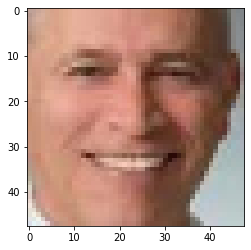

In [80]:
plt.imshow(images[10])

This shape can be used as parameters to the model that we define i.e Convolutional Neural Network

In [81]:
image.shape

(48, 48, 3)

As said convert those lists into numpy arrays and save them into a directory (in my case directory is 'output')

In [82]:
import numpy as np
images_f = np.array(images)
genders_f = np.array(genders)
ages_f = np.array(ages)

In [83]:
output_path = '/content/output/' #set the output path

In [84]:
np.save(output_path+'image.npy',images_f)
np.save(output_path+'gender.npy',genders_f)
np.save(output_path+'age.npy',ages_f)

# Dataset Information

In [85]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


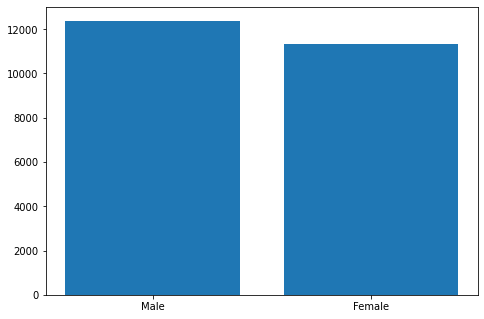

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

In [89]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [90]:
val=values.tolist()
cnt=counts.tolist()

[]

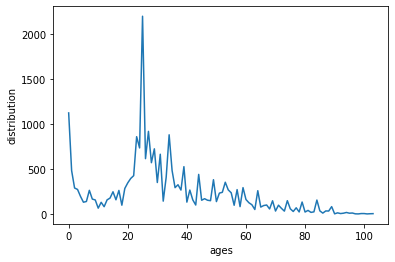

In [91]:
#age distribution
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.plot()

# Model definition


In [92]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [93]:
images_f_2=images_f/255
labels_f = np.array(labels)

In [94]:
images_f_2.shape

(23708, 48, 48, 3)

In [95]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [97]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

# Model CNN

In [98]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.0001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  conv_5 = Convolution(maxp_4,1024)
  maxp_5 = MaxPooling2D(pool_size=(2,2)) (conv_5)
  flatten= Flatten() (maxp_5)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])  
  model.compile(loss=["binary_crossentropy",'mae'], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [99]:
Model=model((48,48,3))

In [100]:
Model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 48, 48, 32)   896         input_9[0][0]                    
__________________________________________________________________________________________________
dropout_53 (Dropout)            (None, 48, 48, 32)   0           conv2d_41[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 48, 48, 32)   0           dropout_53[0][0]                 
____________________________________________________________________________________________

In [101]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [102]:
fle_s='Age_detection_202.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [103]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=600,callbacks=[callback_list])

Epoch 1/600
278/278 [==============================] - 5s 14ms/step - loss: 17.7463 - sex_out_loss: 0.7461 - age_out_loss: 16.9470 - sex_out_accuracy: 0.5189 - age_out_accuracy: 0.0481 - val_loss: 13.3165 - val_sex_out_loss: 0.6728 - val_age_out_loss: 12.5961 - val_sex_out_accuracy: 0.5966 - val_age_out_accuracy: 0.0483

Epoch 00001: val_loss improved from inf to 13.31654, saving model to Age_detection_202.h5
Epoch 2/600
278/278 [==============================] - 4s 13ms/step - loss: 12.2987 - sex_out_loss: 0.6565 - age_out_loss: 11.5908 - sex_out_accuracy: 0.6109 - age_out_accuracy: 0.0479 - val_loss: 10.6773 - val_sex_out_loss: 0.6060 - val_age_out_loss: 10.0105 - val_sex_out_accuracy: 0.6914 - val_age_out_accuracy: 0.0483

Epoch 00002: val_loss improved from 13.31654 to 10.67729, saving model to Age_detection_202.h5
Epoch 3/600
278/278 [==============================] - 4s 13ms/step - loss: 10.8511 - sex_out_loss: 0.6009 - age_out_loss: 10.1873 - sex_out_accuracy: 0.6842 - age_out_a